# Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Preparation

In [2]:
df_2019 = pd.read_csv("D:/Jupyter/OIBSIP-DataScience Projects/Task2-Unemployment_Analysis/Data/Unemployment in India.csv")
df_2020 = pd.read_csv("D:/Jupyter/OIBSIP-DataScience Projects/Task2-Unemployment_Analysis/Data/Unemployment_Rate_upto_11_2020.csv")

In [3]:
df_2019.head()

Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural

In [4]:
df_2020.head()

Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020         M                             5.48   
1  Andhra Pradesh   29-02-2020         M                             5.83   
2  Andhra Pradesh   31-03-2020         M                             5.79   
3  Andhra Pradesh   30-04-2020         M                            20.51   
4  Andhra Pradesh   31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [5]:
columns = {'Region': 'States', 'Region.1': 'Region'}
df_2020.rename(columns=columns, inplace=True)
df_2019.rename(columns={'Region':'States'}, inplace=True)

In [6]:
df_2019.head()

States         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural

In [7]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   States                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df_2020.head()

States         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020         M                             5.48   
1  Andhra Pradesh   29-02-2020         M                             5.83   
2  Andhra Pradesh   31-03-2020         M                             5.79   
3  Andhra Pradesh   30-04-2020         M                            20.51   
4  Andhra Pradesh   31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region  \
0            16635535                                    41.02  South   
1            16545652                                    40.90  South   
2            15881197                                    39.18  South   
3            11336911                                    33.10  South   
4            12988845                                    36.46  South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [9]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   States                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region                                   267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:
df_2019.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000

In [11]:
df_2020.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)   longitude    latitude  
count                               267.000000  267.000000  267.000000  
mean                                 41.681573   22.826048   80.532425  
std                                   7.845419    6.270731    5.831738  
min                                  16.770000   10.850500   71.192400  
25%                                  37.265000   18.112400   76.085600  
50%                                  40.390000   23.610200   79.019300  
75%                                  44.055000   27.278400   85.279900  
max                                  69.690000   33.778200   92.937600

### Column Wise missing values : 

In [12]:
def find_missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    return pd.concat([total,percentage] , axis = 1 , keys = ['Total' , 'Percent'])
find_missing_data(df_2019)

Total   Percent
States                                      28  0.036458
Date                                        28  0.036458
Frequency                                   28  0.036458
Estimated Unemployment Rate (%)             28  0.036458
Estimated Employed                          28  0.036458
Estimated Labour Participation Rate (%)     28  0.036458
Area                                        28  0.036458

In [13]:
find_missing_data(df_2020)

Total  Percent
States                                       0      0.0
Date                                         0      0.0
Frequency                                    0      0.0
Estimated Unemployment Rate (%)              0      0.0
Estimated Employed                           0      0.0
Estimated Labour Participation Rate (%)      0      0.0
Region                                       0      0.0
longitude                                    0      0.0
latitude                                     0      0.0

In [14]:
df_2019.dropna(inplace=True)

### Drop the Frequency column

In [16]:
print(f'{df_2020.Frequency.unique()}')
df_2019.drop(['Frequency'], axis=1, inplace=True)
df_2020.drop(['Frequency'], axis=1, inplace=True)

[' M']


### Filling in the missing columns in the 2019 Dataset with Region, Longitude, and Latitude

In [17]:
temp = df_2020.loc[:, ["States", "Region", "longitude", "latitude"]]

temp = temp.drop_duplicates(subset=['States'])

df_2019 = df_2019.merge(temp, on='States', how='left')
df_2019

States         Date  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019                             3.65   
1    Andhra Pradesh   30-06-2019                             3.05   
2    Andhra Pradesh   31-07-2019                             3.75   
3    Andhra Pradesh   31-08-2019                             3.32   
4    Andhra Pradesh   30-09-2019                             5.17   
..              ...          ...                              ...   
735     West Bengal   29-02-2020                             7.55   
736     West Bengal   31-03-2020                             6.67   
737     West Bengal   30-04-2020                            15.63   
738     West Bengal   31-05-2020                            15.22   
739     West Bengal   30-06-2020                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0            11999139.0                                    43.24  Rural   
1            11755881.0                                    42.05  Rural   
2            12086707.0                                    43.50  Rural   
3            12285693.0                                    43.97  Rural   
4            12256762.0                                    44.68  Rural   
..                  ...                                      ...    ...   
735          10871168.0                                    44.09  Urban   
736          10806105.0                                    43.34  Urban   
737           9299466.0                                    41.20  Urban   
738           9240903.0                                    40.67  Urban   
739           9088931.0                                    37.57  Urban   

    Region  longitude  latitude  
0    South    15.9129    79.740  
1    South    15.9129    79.740  
2    South    15.9129    79.740  
3    South    15.9129    79.740  
4    South    15.9129    79.740  
..     ...        ...       ...  
735   East    22.9868    87.855  
736   East    22.9868    87.855  
737   East    22.9868    87.855  
738   East    22.9868    87.855  
739   East    22.9868    87.855  

[740 rows x 9 columns]

### Converting the Date column in the Datasets to DD/MM/YYYY and a Month only column

In [18]:
# Converting Date column in 2019 Dataset to Datetime
df_2019['Date'] = pd.to_datetime(df_2019['Date'], dayfirst=True)
df_2019['Month_int'] = df_2019['Date'].dt.month
df_2019['Month'] = df_2019['Month_int'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
df_2019.drop(['Month_int'], axis=1, inplace=True)
df_2019['Date'] = df_2019['Date'].dt.strftime('%d-%m-%Y')

# Converting Date column in 2020 Dataset to Datetime
df_2020['Date'] = pd.to_datetime(df_2020['Date'], dayfirst=True)
df_2020['Month_int'] = df_2020['Date'].dt.month
df_2020['Month'] = df_2020['Month_int'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
df_2020.drop(['Month_int'], axis=1, inplace=True)
df_2020['Date'] = df_2020['Date'].dt.strftime('%d-%m-%Y')

In [19]:
df_2019.head()

States        Date  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019                             3.65   
1  Andhra Pradesh  30-06-2019                             3.05   
2  Andhra Pradesh  31-07-2019                             3.75   
3  Andhra Pradesh  31-08-2019                             3.32   
4  Andhra Pradesh  30-09-2019                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area Region  \
0          11999139.0                                    43.24  Rural  South   
1          11755881.0                                    42.05  Rural  South   
2          12086707.0                                    43.50  Rural  South   
3          12285693.0                                    43.97  Rural  South   
4          12256762.0                                    44.68  Rural  South   

   longitude  latitude      Month  
0    15.9129     79.74        May  
1    15.9129     79.74       June  
2    15.9129     79.74       July  
3    15.9129     79.74     August  
4    15.9129     79.74  September

### Replacing the NA values with String Value to avoid Errors

In [20]:
df_2019.Region.unique()
df_2019['Region'] = df_2019['Region'].fillna('Unknown')

In [21]:
df_2020.head()

States        Date  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020                             5.48   
1  Andhra Pradesh  29-02-2020                             5.83   
2  Andhra Pradesh  31-03-2020                             5.79   
3  Andhra Pradesh  30-04-2020                            20.51   
4  Andhra Pradesh  31-05-2020                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region  \
0            16635535                                    41.02  South   
1            16545652                                    40.90  South   
2            15881197                                    39.18  South   
3            11336911                                    33.10  South   
4            12988845                                    36.46  South   

   longitude  latitude     Month  
0    15.9129     79.74   January  
1    15.9129     79.74  February  
2    15.9129     79.74     March  
3    15.9129     79.74     April  
4    15.9129     79.74       May

# Exploratory Data Analysis

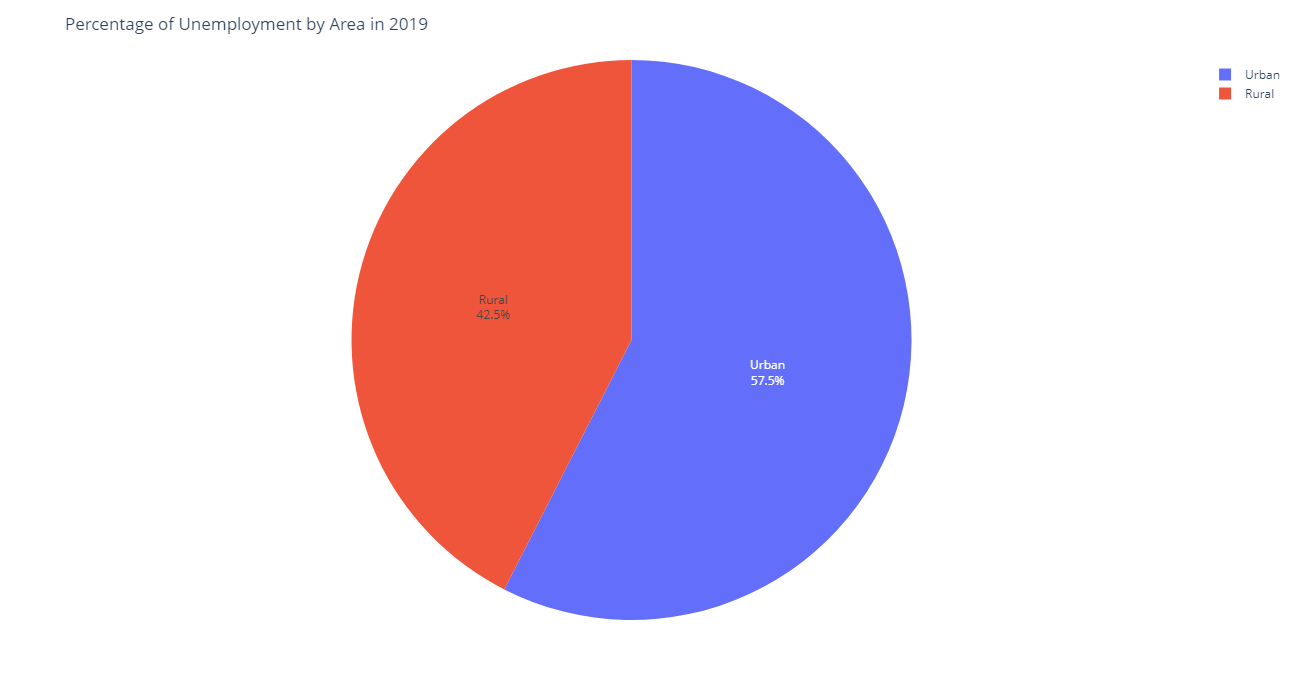

In [22]:
fig = px.pie(df_2019, values='Estimated Unemployment Rate (%)', names='Area',
                    template="plotly_white")
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(height=700,
                  title='Percentage of Unemployment by Area in 2019')
fig.show()

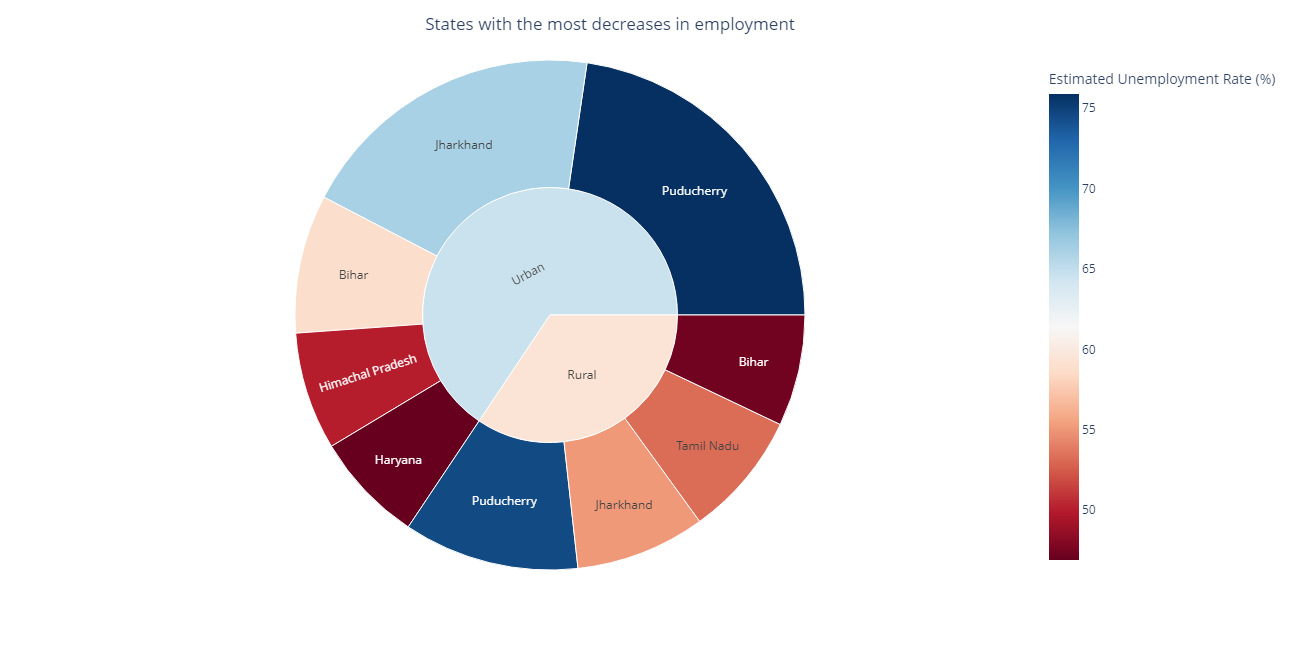

In [24]:
temp_df = df_2019.copy()
sun = temp_df.sort_values('Estimated Unemployment Rate (%)', ascending=False).iloc[:11]

fig = px.sunburst(sun, path=['Area','States'], values='Estimated Unemployment Rate (%)',
                  color='Estimated Unemployment Rate (%)',
                  color_continuous_scale='rdbu',template="plotly_white",
                  )
fig.update_layout(height=650, title = "States with the most decreases in employment" , title_x = 0.47,)
fig.show()

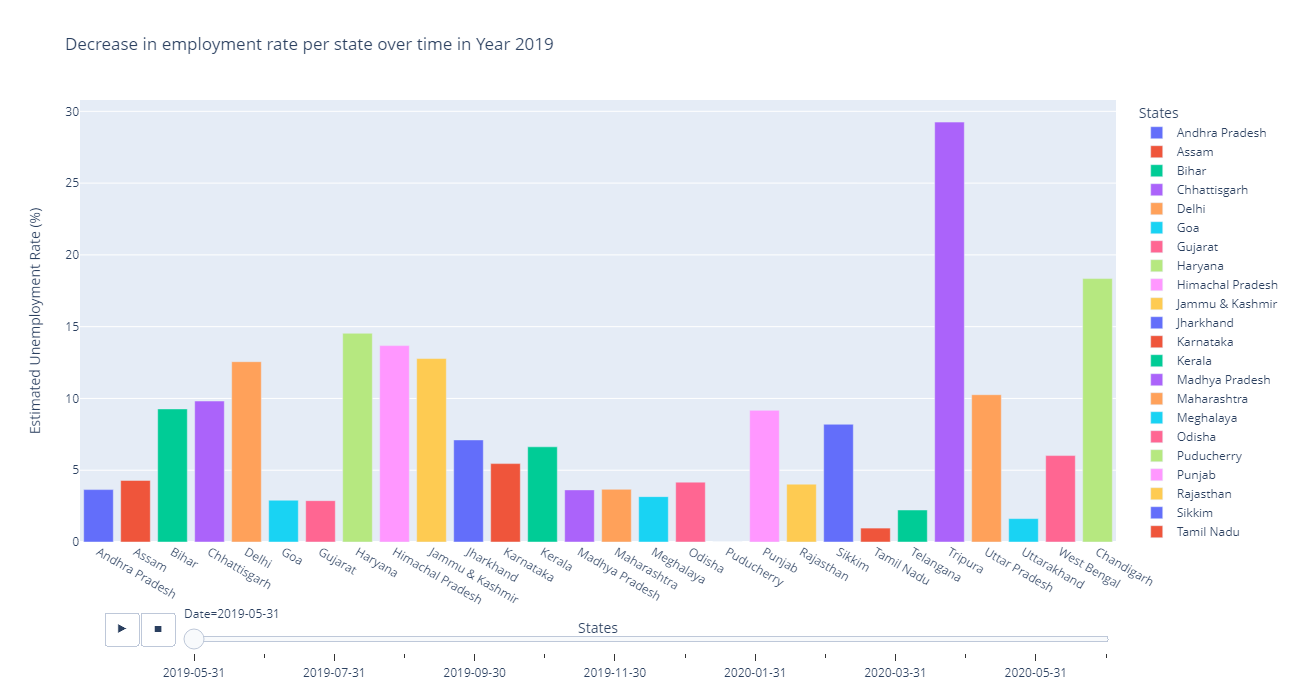

In [25]:
temp_df = df_2019.copy()

temp_df["Date"] = pd.to_datetime(temp_df["Date"]).dt.date

temp_df = temp_df.drop_duplicates(subset=['Date', 'States'])

fig = px.bar(temp_df,x='States',y='Estimated Unemployment Rate (%)',color='States',
             title='Decrease in employment rate per state over time in Year 2019',animation_frame='Date',template='plotly')
fig.update_layout(height=700)
fig.show()

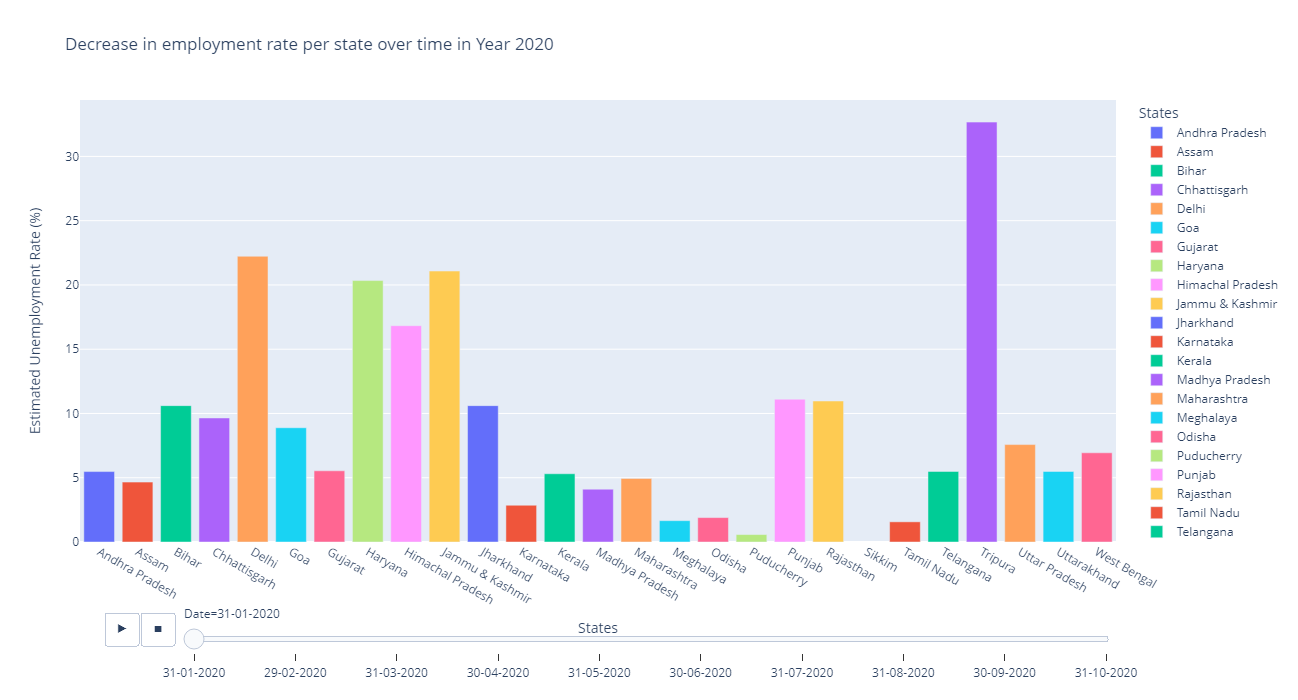

In [26]:
fig = px.bar(df_2020,x='States',y='Estimated Unemployment Rate (%)',color='States',
             title='Decrease in employment rate per state over time in Year 2020',animation_frame='Date',template='plotly')
fig.update_layout(height=700)
fig.show()

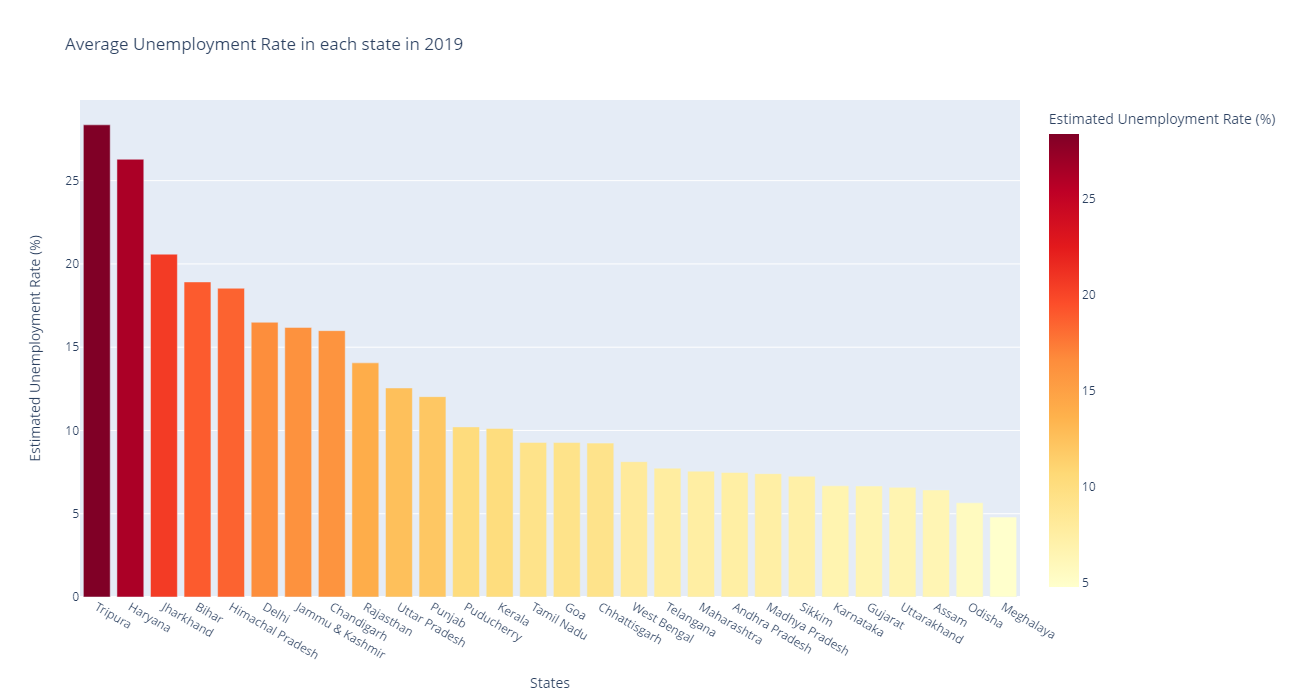

In [27]:
temp_df = df_2019.groupby('States').mean().reset_index()

temp_df = temp_df.sort_values('Estimated Unemployment Rate (%)', ascending=False)

fig = px.bar(temp_df, x='States',y='Estimated Unemployment Rate (%)',color='Estimated Unemployment Rate (%)',
            title='Average Unemployment Rate in each state in 2019', color_continuous_scale='ylorrd', template='plotly')
fig.update_layout(height=700)

fig.show()

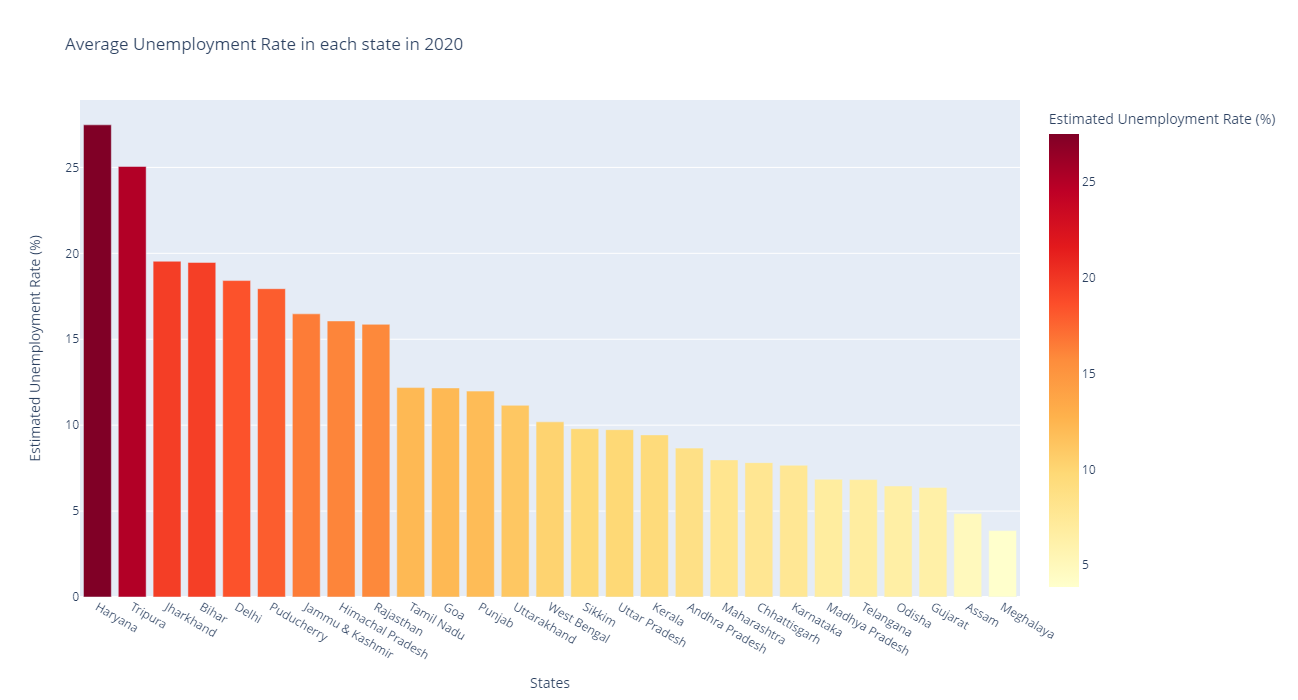

In [28]:
temp_df = df_2020.groupby('States').mean().reset_index()

temp_df = temp_df.sort_values('Estimated Unemployment Rate (%)', ascending=False)

fig = px.bar(temp_df, x='States',y='Estimated Unemployment Rate (%)',color='Estimated Unemployment Rate (%)',
            title='Average Unemployment Rate in each state in 2020', color_continuous_scale='ylorrd', template='plotly')
fig.update_layout(height=700)

fig.show()

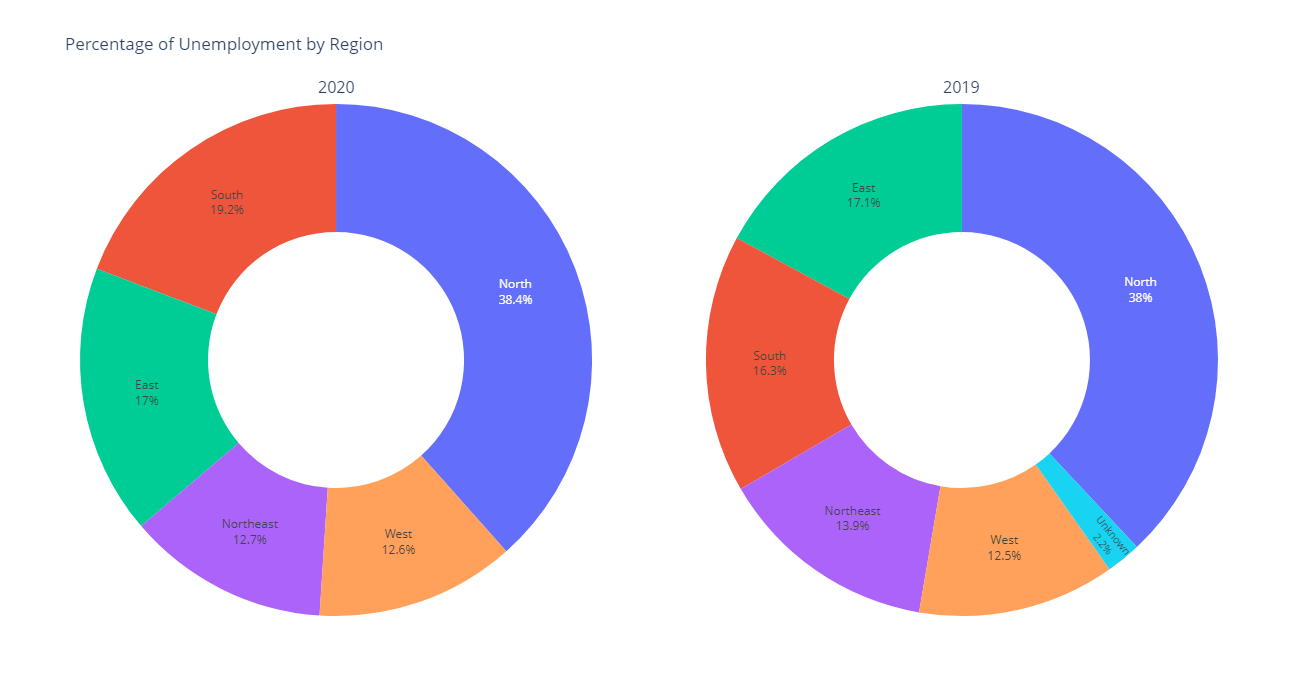

In [29]:
fig = make_subplots(1, 2, subplot_titles=['2020', '2019'], specs=[[{'type': 'pie'}, {'type': 'pie'}]])

fig.add_trace(go.Pie(labels=df_2020['Region'], values=df_2020['Estimated Unemployment Rate (%)'],hole=.5, 
                     showlegend=False), row=1, col=1)

fig.add_trace(go.Pie(labels=df_2019['Region'], values=df_2019['Estimated Unemployment Rate (%)'],hole=.5,
                     showlegend=False), row=1, col=2)

fig.update_traces(textposition='inside',textinfo='percent+label')

fig.update_layout(height=700,
                  title='Percentage of Unemployment by Region')
fig.show()

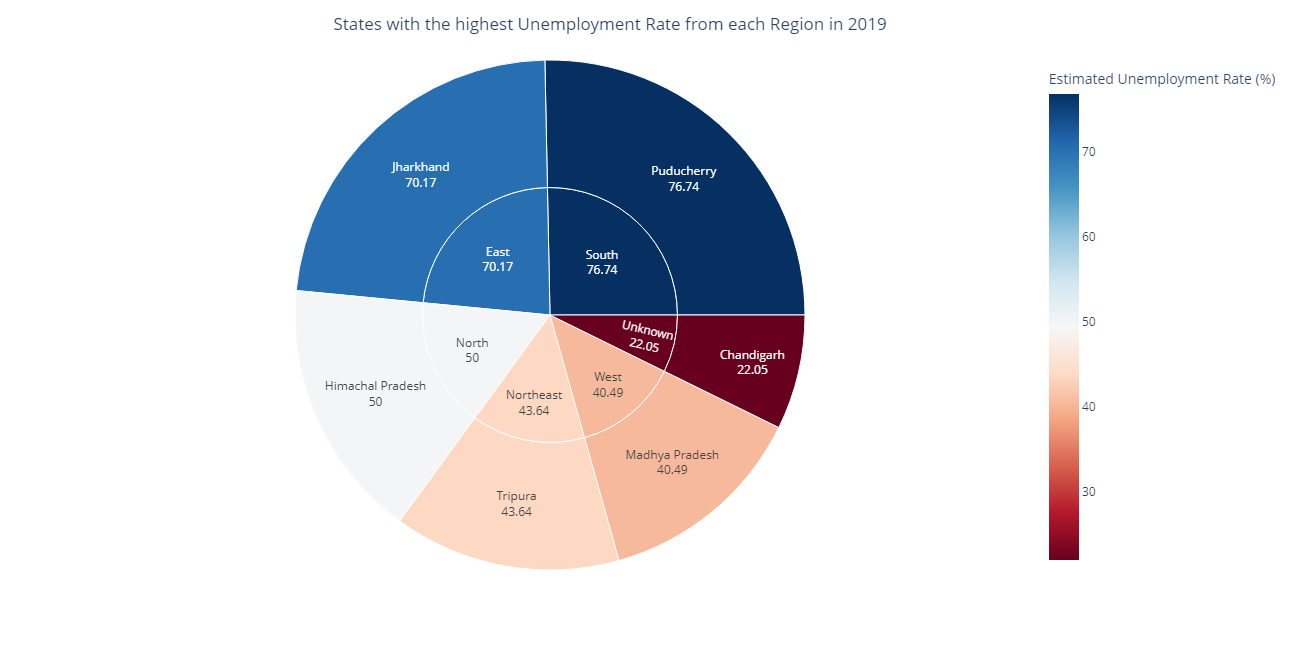

In [30]:
temp_df = df_2019.copy()
sun = temp_df.sort_values('Estimated Unemployment Rate (%)', ascending=False).drop_duplicates('Region')

fig = px.sunburst(sun, path=['Region','States'], values='Estimated Unemployment Rate (%)',
                  color='Estimated Unemployment Rate (%)',
                  color_continuous_scale='rdbu',template="plotly_white",
                  )
fig.update_traces(textinfo="label+value")
fig.update_layout(height=650, title = "States with the highest Unemployment Rate from each Region in 2019" , title_x = 0.47,)
fig.show()

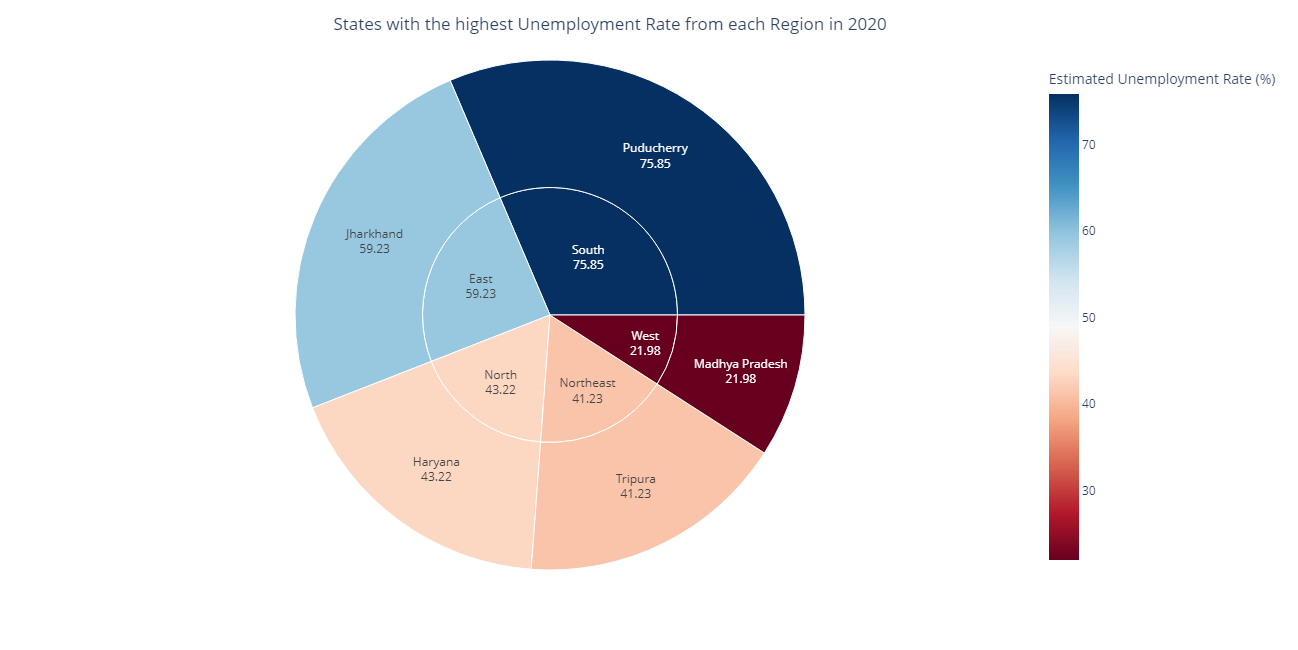

In [31]:
temp_df = df_2020.copy()
sun = temp_df.sort_values('Estimated Unemployment Rate (%)', ascending=False).drop_duplicates('Region')

fig = px.sunburst(sun, path=['Region','States'], values='Estimated Unemployment Rate (%)',
                  color='Estimated Unemployment Rate (%)',
                  color_continuous_scale='rdbu',template="plotly_white",
                  )
fig.update_traces(textinfo="label+value")
fig.update_layout(height=650, title = "States with the highest Unemployment Rate from each Region in 2020" , title_x = 0.47,)
fig.show()

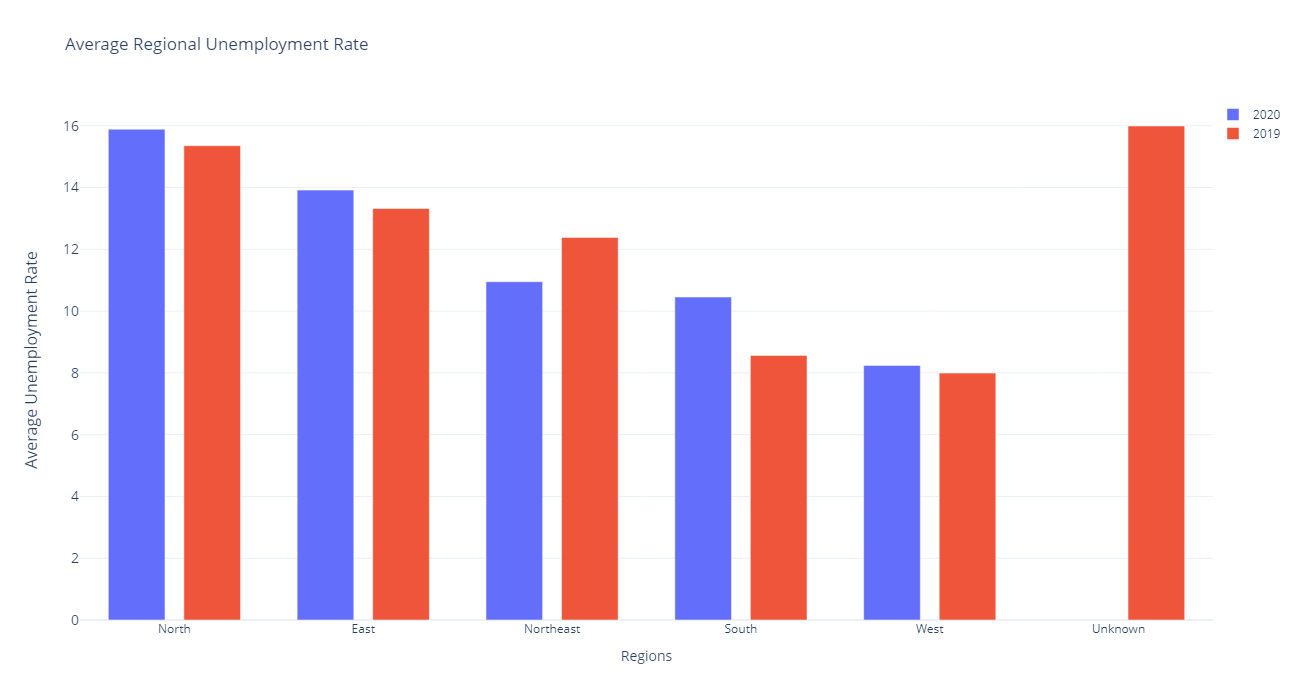

In [32]:
temp_2020 = df_2020.groupby([ df_2020.Region]).mean().sort_values(by = ['Estimated Unemployment Rate (%)'], ascending = False)
temp_2020 = temp_2020.reset_index()
temp_2019 = df_2019.groupby([ df_2019.Region]).mean().sort_values(by = ['Estimated Unemployment Rate (%)'], ascending = False)
temp_2019 = temp_2019.reset_index()
categories = ['2019', '2020']


trace1 = go.Bar(
    x=temp_2020["Region"],
    y=temp_2020["Estimated Unemployment Rate (%)"],
    name='2020'
)


trace2 = go.Bar(
    x=temp_2019["Region"],
    y=temp_2019["Estimated Unemployment Rate (%)"],
    name='2019'
)

layout = go.Layout(
    title='Double Bar Graph Example',
    xaxis=dict(title='Regions'),
    yaxis=dict(title='Values'),
    barmode='group' 
)


fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.update_layout(height=700,
    title='Average Regional Unemployment Rate',
    yaxis=dict(
        title='Average Unemployment Rate',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1.0,
        y=1.0),
    barmode='group',
    bargroupgap=0.25,
    template="plotly_white"
)

fig.show()

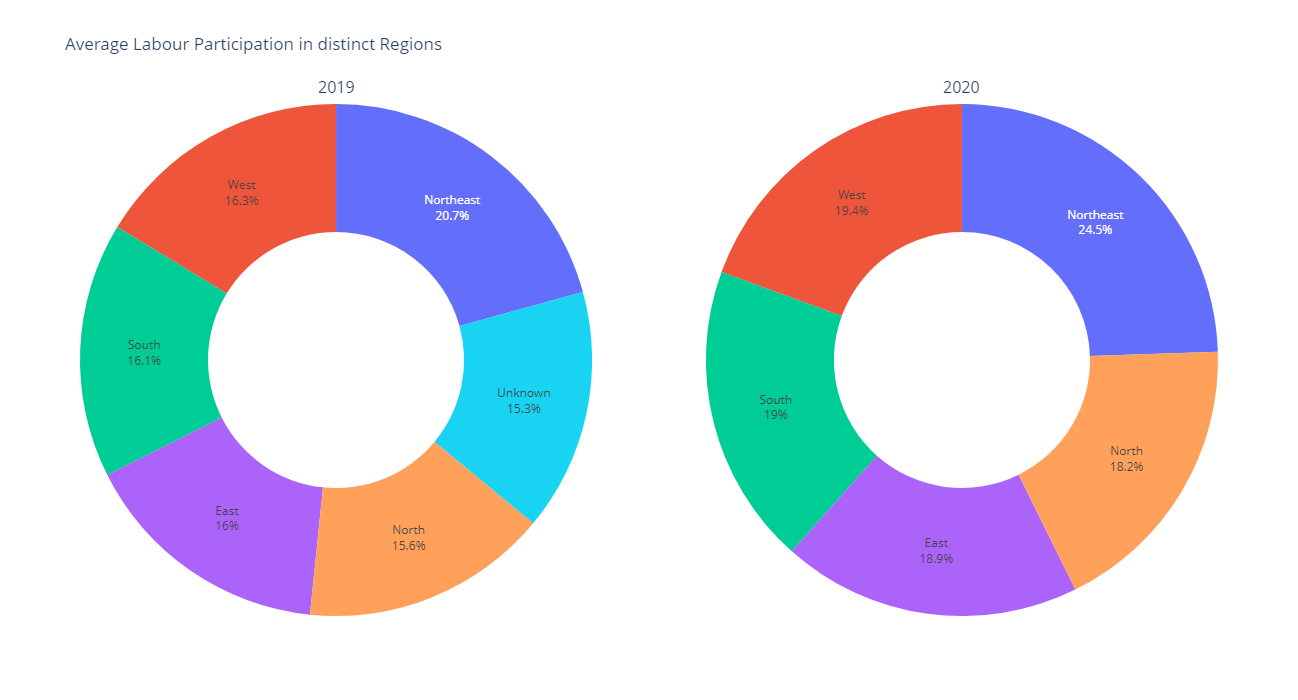

In [33]:
temp_2019 = df_2019.groupby('Region').mean().reset_index()
temp_2020 = df_2020.groupby('Region').mean().reset_index()
fig = make_subplots(1, 2, subplot_titles=['2019','2020'], specs=[[{'type': 'pie'}, {'type': 'pie'}]])

fig.add_trace(go.Pie(labels=temp_2019['Region'], values=temp_2019['Estimated Labour Participation Rate (%)'],hole=.5, 
                     showlegend=False), row=1, col=1)

fig.add_trace(go.Pie(labels=temp_2020['Region'], values=temp_2020['Estimated Labour Participation Rate (%)'],hole=.5,
                     showlegend=False), row=1, col=2)

fig.update_traces(textposition='inside',textinfo='percent+label')

fig.update_layout(height=700,
                  title='Average Labour Participation in distinct Regions')
fig.show()


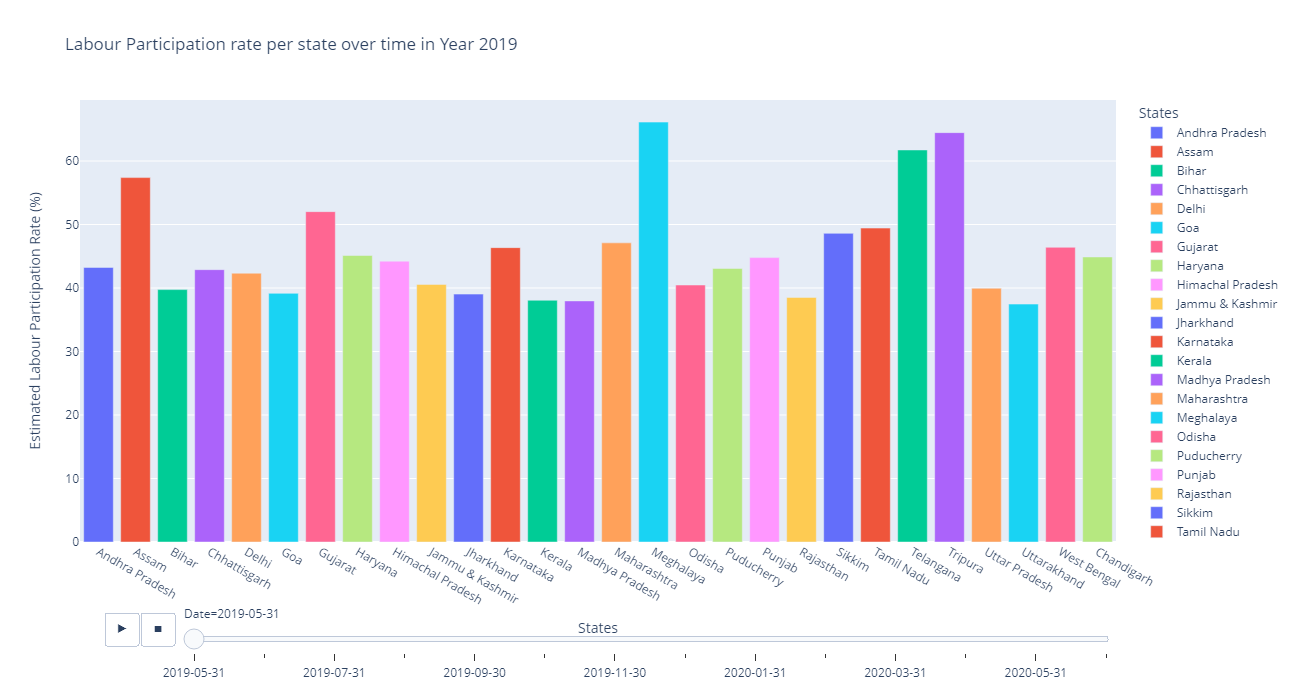

In [34]:
temp_df = df_2019.copy()

temp_df["Date"] = pd.to_datetime(temp_df["Date"]).dt.date

temp_df = temp_df.drop_duplicates(subset=['Date', 'States'])

fig = px.bar(temp_df,x='States',y='Estimated Labour Participation Rate (%)',color='States',
             title='Labour Participation rate per state over time in Year 2019',animation_frame='Date',template='plotly')
fig.update_layout(height=700)
fig.show()

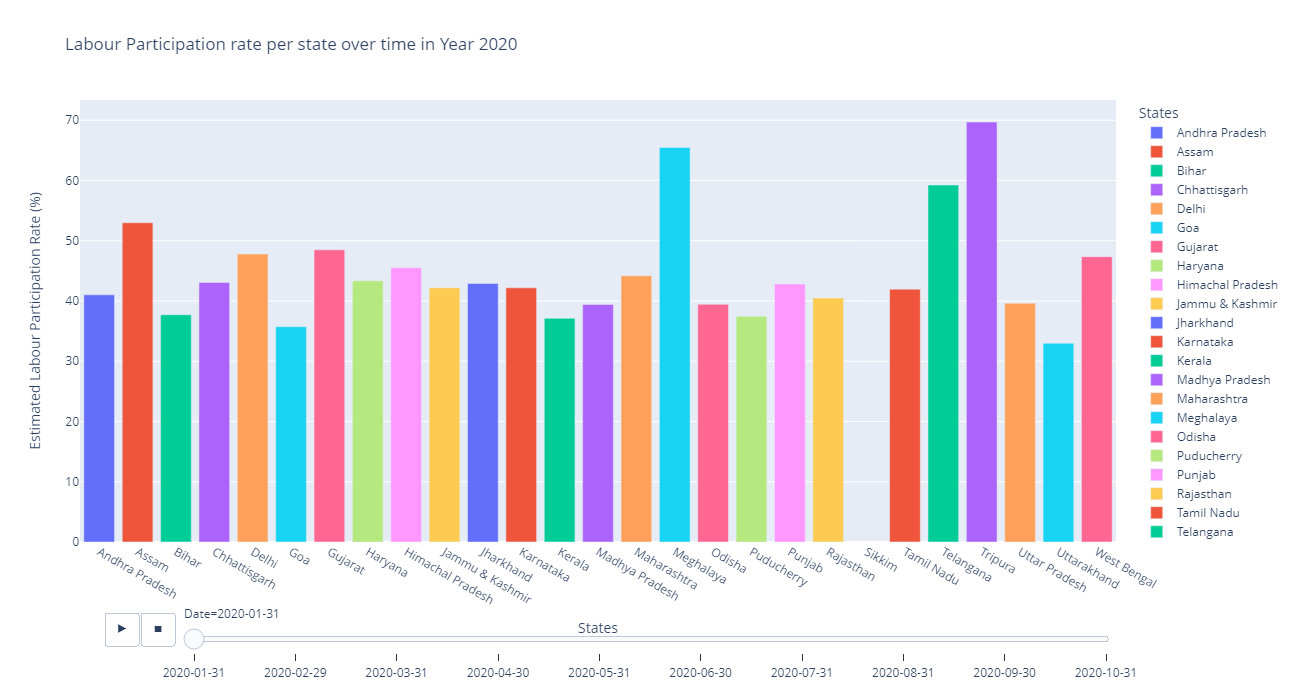

In [35]:
temp_df = df_2020.copy()

temp_df["Date"] = pd.to_datetime(temp_df["Date"]).dt.date

temp_df = temp_df.drop_duplicates(subset=['Date', 'States'])

fig = px.bar(temp_df,x='States',y='Estimated Labour Participation Rate (%)',color='States',
             title='Labour Participation rate per state over time in Year 2020',animation_frame='Date',template='plotly')
fig.update_layout(height=700)
fig.show()

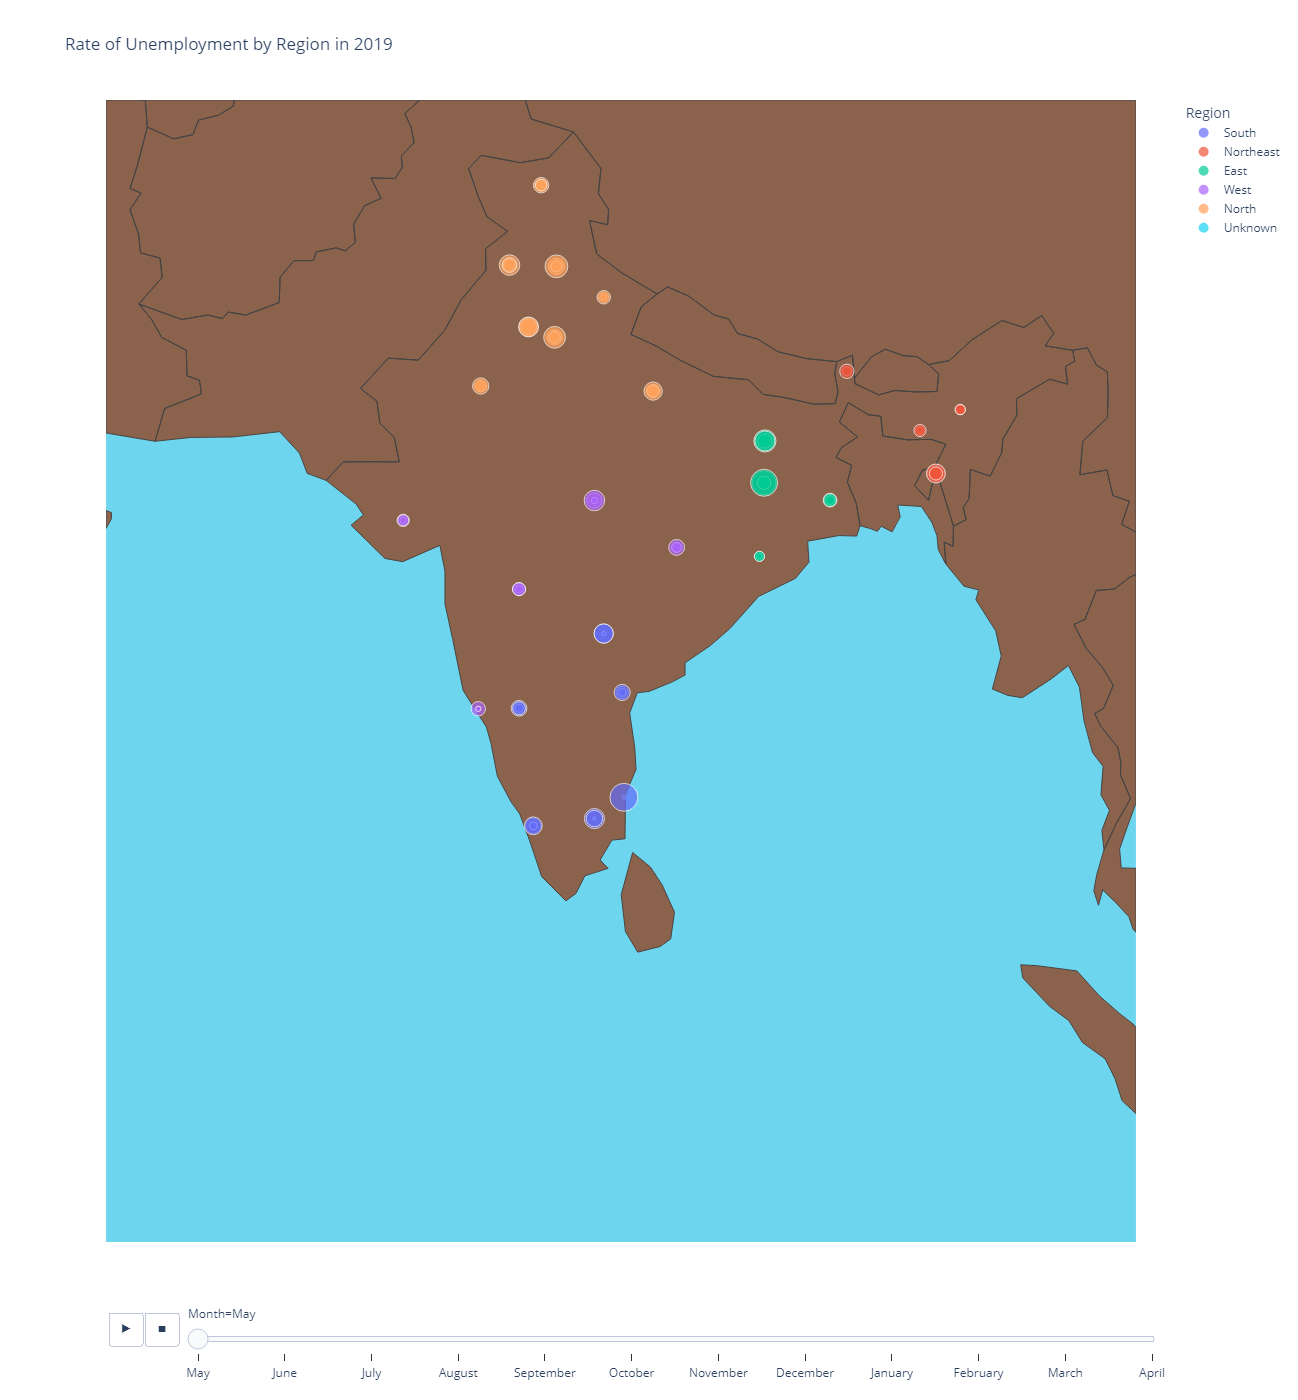

In [41]:
fig = px.scatter_geo(df_2019,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate (%)",
                     animation_frame="Month",scope='asia',template='plotly',title='Rate of Unemployment by Region in 2019')

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100], landcolor="#8b624c" ,oceancolor="#6dd5ed",showocean=True)
fig.update_layout(height=700)

fig.show()

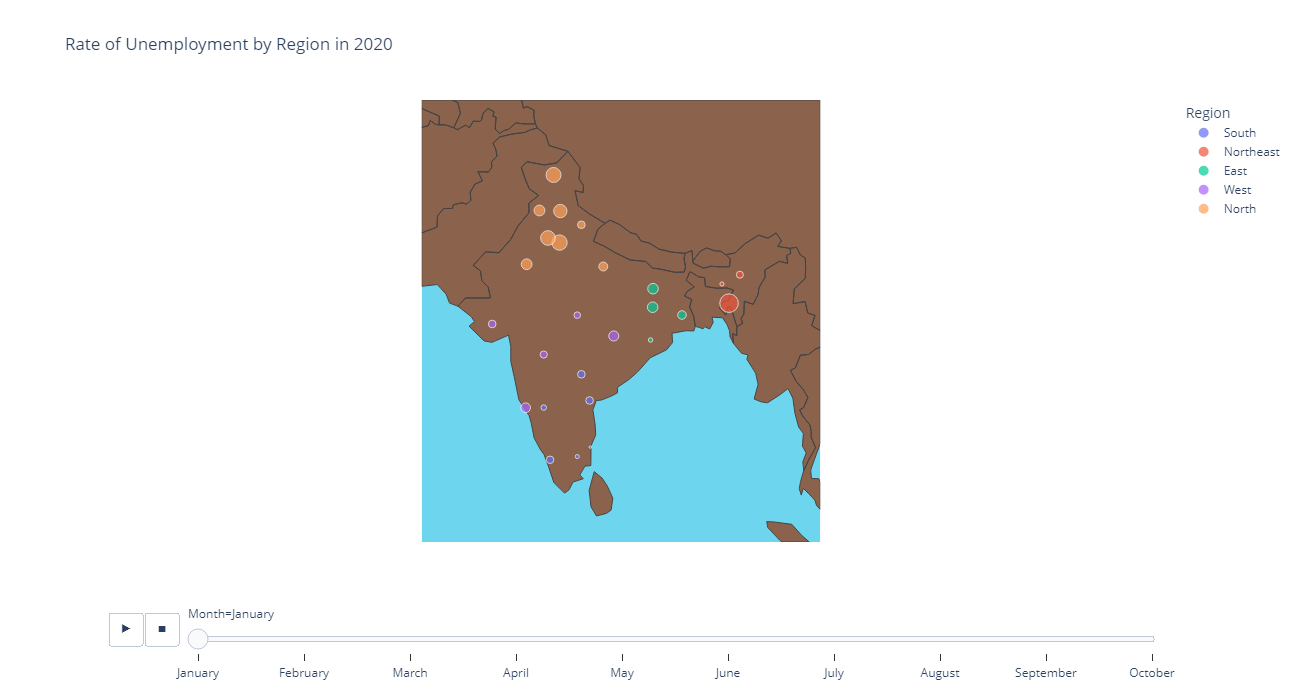

In [39]:
fig = px.scatter_geo(df_2020,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate (%)",
                     animation_frame="Month",scope='asia',template='plotly',title='Rate of Unemployment by Region in 2020')


fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100], landcolor="#8b624c" , oceancolor="#6dd5ed",showocean=True)
fig.update_layout(height=700)

fig.show()

# Insights

#### Following were the most impacted States/Region during Lockdown:
- Haryana - North
- Tripura - Northeast
- Jharkhand - East
- Puducherry - South
- Madhya Pradesh - West

##### On average, the North was the region most impacted in 2019 and 2020, followed by the East.
##### India's most affected States were Tripura and Haryana, while Meghalaya, Gujarat, and Odisha had the least impact.
 